In [5]:
!pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable
  Using cached mplfinance-0.12.9b1-py3-none-any.whl (70 kB)


In [6]:
import pandas as pd
#import yfinance as yf
import mplfinance as mf
import matplotlib.pyplot as plt

In [7]:
# Loading data with date column

class plot_data:
    def __init__(self):
        self.stock_df = ""
    
    def load_stock_with_date(self,path):
        self.stock_df = pd.read_csv(path,sep=',')
        #stock.columns=['Date','Open', 'High', 'Low', 'Avg.','Close', 'Volume']
        self.stock_df['Date']=pd.to_datetime(self.stock_df.Date)
        self.stock_df.index = self.stock_df['Date']
        self.stock_df = self.stock_df.sort_index(ascending=False)
        #self.stock_df['Volume'] = pd.to_numeric(self.stock_df['Turnover'].replace(',','', inplace=True))
        self.stock_df['Volume'] = pd.to_numeric(self.stock_df['Turnover'])
        # Remove column name Date and Volume
        self.stock_df = self.stock_df.drop(['Date'], axis = 1)

        self.stock_df = self.stock_df.drop(['Turnover'], axis = 1)
        self.stock_df = self.stock_df.drop(['Symbol'], axis = 1)
        self.stock_df = self.stock_df.drop(['Name'], axis = 1)
        self.stock_df = self.stock_df.drop(['Avg.'], axis = 1)
        self.stock_df = self.stock_df.drop(['LDCP'], axis = 1)

        return self.stock_df
    
    def plot_candlestick(self,levels):
        # Plot N rows
        stockdata = self.stock_df[:260].sort_values(by='Date',ascending=True)
        mf.plot(stockdata, 
            type = 'candle',
            style =  'charles',
            title = 'Stock Analysis with CandleStick Chart',
            ylabel = 'Prices',
           figratio=(12,8),mav=(3,6,9),volume=True,
            hlines=dict(hlines=levels,colors=['g','r'],linestyle='-.'))

    def plot_stock(self,features):
        self.stock_df[features].plot()
        plt.legend()
        
    def plot_hist(self, feature):
        self.stock_df[feature].hist()
        


In [8]:
path = "D:\\Stock Data\\TRG.csv"

stock_plt = plot_data()
stock = stock_plt.load_stock_with_date(path)
stock.head()







,Open,High,Low,Close,Volume
Date,,,,,
2021-12-30,129.98,129.98,123.50,125.01,17707469
2021-12-29,119.00,122.00,117.01,121.13,11757704
2021-12-29,119.00,122.00,117.01,121.13,11757704
2021-12-28,113.50,119.20,113.02,118.21,12413718
2021-12-27,118.01,118.40,112.34,112.97,9508272


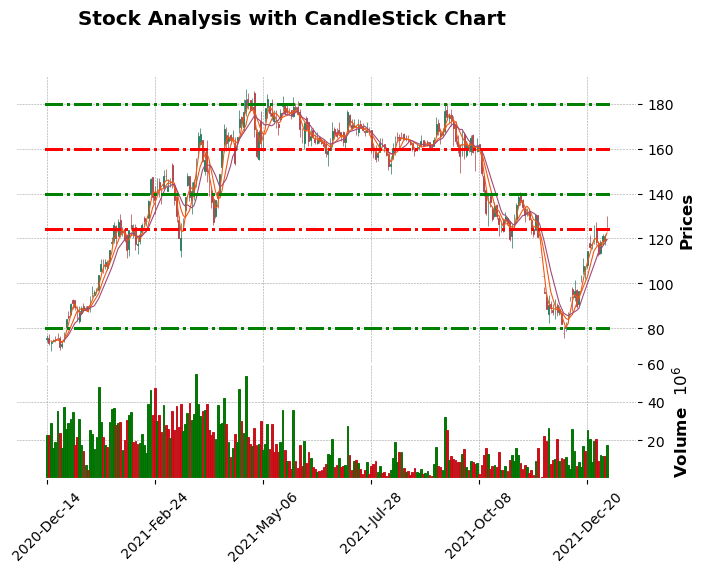

In [9]:
levels = [80,124,140,160,180]
stock_plt.plot_candlestick(levels)

## Open Versus Close Analysis

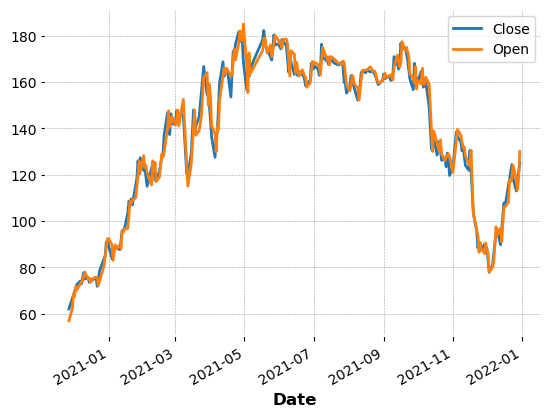

In [10]:
features = ['Close','Open']
stock_plt.plot_stock(features)

## Histogram Analysis

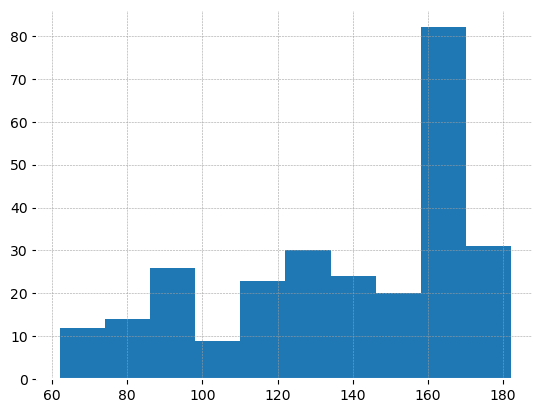

In [11]:
stock_plt.plot_hist('Close')